# Load packages

In [1]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print("Load packages")

Load packages


# Configuration

In [2]:
batch_size = 20
embedding_size = 2
num_sampled = 15

# Sentences

In [3]:
sentences = ["the quick brown fox jumped over the lazy dog",
            "i love cats and dogs",
            "we all love cats and dogs",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are playful",
            "cats are natural hunter",
            "it's raining cats and dogs"]
print("senetences length is %d" %(len(sentences)))

senetences length is 9


# make words

In [4]:
words = " ".join(sentences).split()
print(words)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'i', 'love', 'cats', 'and', 'dogs', 'we', 'all', 'love', 'cats', 'and', 'dogs', 'sung', 'likes', 'cats', 'she', 'loves', 'dogs', 'cats', 'can', 'be', 'very', 'independent', 'cats', 'are', 'playful', 'cats', 'are', 'natural', 'hunter', "it's", 'raining', 'cats', 'and', 'dogs']


In [5]:
count = collections.Counter(words).most_common()
print(count)

[('cats', 7), ('dogs', 4), ('and', 3), ('love', 2), ('the', 2), ('are', 2), ('raining', 1), ('all', 1), ('be', 1), ('over', 1), ('we', 1), ('playful', 1), ('likes', 1), ('sung', 1), ('jumped', 1), ('fox', 1), ('she', 1), ('brown', 1), ('lazy', 1), ('very', 1), ('hunter', 1), ('independent', 1), ('natural', 1), ('i', 1), ('dog', 1), ('can', 1), ('loves', 1), ("it's", 1), ('quick', 1)]


# make Dictionary 

In [6]:
rdic = [i[0] for i in count] #id -> word
print(rdic)
dic = {w: i for i, w in enumerate (rdic)}  #word -> id
voc_size = len(dic)
#print(rdic)
print(dic)

['cats', 'dogs', 'and', 'love', 'the', 'are', 'raining', 'all', 'be', 'over', 'we', 'playful', 'likes', 'sung', 'jumped', 'fox', 'she', 'brown', 'lazy', 'very', 'hunter', 'independent', 'natural', 'i', 'dog', 'can', 'loves', "it's", 'quick']
{'and': 2, 'raining': 6, 'all': 7, 'love': 3, 'be': 8, 'over': 9, 'we': 10, 'playful': 11, 'are': 5, 'sung': 13, 'jumped': 14, 'fox': 15, 'cats': 0, 'dogs': 1, 'can': 25, 'brown': 17, 'lazy': 18, 'very': 19, 'hunter': 20, 'independent': 21, 'natural': 22, 'i': 23, 'dog': 24, 'she': 16, 'loves': 26, "it's": 27, 'quick': 28, 'the': 4, 'likes': 12}


In [7]:
print(rdic[0])
print(dic['cats'])

cats
0


In [8]:
data = [dic[word] for word in words]
print(data)

[4, 28, 17, 15, 14, 9, 4, 18, 24, 23, 3, 0, 2, 1, 10, 7, 3, 0, 2, 1, 13, 12, 0, 16, 26, 1, 0, 25, 8, 19, 21, 0, 5, 11, 0, 5, 22, 20, 27, 6, 0, 2, 1]


# Make CBow data

In [9]:
cbow_pairs = []
for i in range(1, len(data)-1):
    cbow_pairs.append([[data[i-1],data[i+1]], data[i]])
print(cbow_pairs)

[[[4, 17], 28], [[28, 15], 17], [[17, 14], 15], [[15, 9], 14], [[14, 4], 9], [[9, 18], 4], [[4, 24], 18], [[18, 23], 24], [[24, 3], 23], [[23, 0], 3], [[3, 2], 0], [[0, 1], 2], [[2, 10], 1], [[1, 7], 10], [[10, 3], 7], [[7, 0], 3], [[3, 2], 0], [[0, 1], 2], [[2, 13], 1], [[1, 12], 13], [[13, 0], 12], [[12, 16], 0], [[0, 26], 16], [[16, 1], 26], [[26, 0], 1], [[1, 25], 0], [[0, 8], 25], [[25, 19], 8], [[8, 21], 19], [[19, 0], 21], [[21, 5], 0], [[0, 11], 5], [[5, 0], 11], [[11, 5], 0], [[0, 22], 5], [[5, 20], 22], [[22, 27], 20], [[20, 6], 27], [[27, 0], 6], [[6, 2], 0], [[0, 1], 2]]


# skip-gram

In [10]:
skip_gram_pairs = []
for c in cbow_pairs:
    skip_gram_pairs.append([c[1],c[0][0]])
    skip_gram_pairs.append([c[1],c[0][1]])
    
print(skip_gram_pairs[:5])

[[28, 4], [28, 17], [17, 28], [17, 15], [15, 17]]


In [11]:
def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data = []
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])
        y_data.append([skip_gram_pairs[i][1]])
    return x_data, y_data

# Network

In [13]:
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

embedding = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
embed = tf.nn.embedding_lookup(embedding, train_inputs)  #lookup table

nce_w = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0,1.0))
nce_b = tf.Variable(tf.zeros([voc_size]))

#loss = tf.reduce_mean(tf.nn.nce_loss(nce_w, nce_b, embed, train_labels, num_sampled, voc_size))
loss = tf.reduce_mean(
    tf.nn.nce_loss(weights=nce_w, biases=nce_b, inputs=embed, labels=train_labels, 
                   num_sampled=num_sampled, num_classes=voc_size))


optm = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

print("build Network")

build Network


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(3000):
        batch_x, batch_y = generate_batch(batch_size)
        sess.run(optm, feed_dict={train_inputs : batch_x, train_labels : batch_y})
        
    
    trained_embedding = embedding.eval()
    

# Plot Results

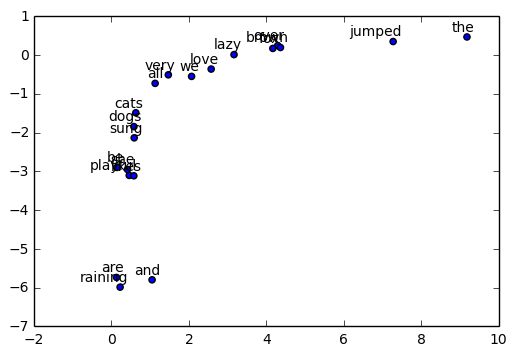

In [18]:
if trained_embedding.shape[1] == 2:
    labels = rdic[:20]
    for i, label in enumerate(labels):
        x, y = trained_embedding[i, :]
        plt.scatter(x,y)
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords="offset points", ha="right", va="bottom")
    plt.show()